***Summary: This notebook provides an overview of the nitrogen cross sections from Phelps that are in NEPC.***

In [1]:
import nepc
from nepc.util import config
import numpy as np
import pandas as pd

In [2]:
pd.set_option('max_colwidth', 100)

***NOTE: You may need to modify the `local` argument in the next command.  `local=True` points to a local copy of the NEPC database. `local=False` points to the NEPC server.***

In [3]:
cnx, cursor = nepc.connect(local=True)

# Full Phelps dataset

In [4]:
n_phelps = nepc.Model(cursor, "phelps")

In [5]:
n_phelps.summary()

Number of cross sections in model: 28


,cs_id,specie,lhsA,rhsA,process,reaction,threshold,E_peak,E_upper,sigma_max,lpu,upu
0,424,N2,N2(X1Sigmag+),N2(X1Sigmag+)_jSCHULZ,excitation,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (X ${}^1\Sigma_g^+ j=SCHULZ$) + e$^-$,0.02,2.3,3.6,6.9e-20,-1,-1
1,426,N2,N2(X1Sigmag+),N2(X1Sigmag+)_jSLAR,excitation,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (X ${}^1\Sigma_g^+ j=SLAR$) + e$^-$,0.02,2.2,3.6,2.77e-20,-1,-1
2,436,N2,N2(X1Sigmag+),N2(A3Sigmau+)_v0-4,excitation,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (A ${}^3\Sigma_u^+ v=(0-4)$) + e$^-$,6.17,16,70,1.5e-22,-1,-1
3,437,N2,N2(X1Sigmag+),N2(A3Sigmau+)_v5-9,excitation,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (A ${}^3\Sigma_u^+ v=(5-9)$) + e$^-$,7,16,70,6.5e-22,-1,-1
4,438,N2,N2(X1Sigmag+),N2(B3Pig),excitation,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (B ${}^3\Pi_g$) + e$^-$,7.35,12,70,2.003e-21,-1,-1
5,439,N2,N2(X1Sigmag+),N2(W3Deltau),excitation,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (W ${}^3\Delta_u$) + e$^-$,7.36,16,100,2.546e-21,-1,-1
6,440,N2,N2(X1Sigmag+),N2(A3Sigmau+)_v10-,excitation,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (A ${}^3\Sigma_u^+ v=(10-)$) + e$^-$,7.8,17,70,6.7e-22,-1,-1
7,441,N2,N2(X1Sigmag+),N2(Bp3Sigmau-),excitation,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (B${}^{'} $ ${}^3\Sigma_u^-$) + e$^-$,8.16,15,70,8.38e-22,-1,-1
8,442,N2,N2(X1Sigmag+),N2(ap1Sigmau-),excitation,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (a${}^{'}$ ${}^1\Sigma_u^-$) + e$^-$,8.4,15,150,6.97e-22,-1,-1
9,443,N2,N2(X1Sigmag+),N2(a1Pig),excitation,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (a ${}^1\Pi_g$) + e$^-$,8.55,17,1000,2.023e-21,-1,-1


To inspect the `metadata` or `data` attribute of a particular cross section, use the `Model.subset` method.

In [6]:
n_phelps.subset(filter={'cs_id': 435})[0].metadata

{'cs_id': 435,
 'specie': 'N2',
 'process': 'excitation_v',
 'units_e': 1.0,
 'units_sigma': 1.0,
 'ref': '\\N',
 'lhsA': 'N2(X1Sigmag+)',
 'lhsB': None,
 'rhsA': 'N2(X1Sigmag+)',
 'rhsB': None,
 'threshold': 2.35,
 'wavelength': -1.0,
 'lhs_v': 0,
 'rhs_v': 8,
 'lhs_j': -1,
 'rhs_j': -1,
 'background': 'N2 VIBRATIONAL (V=8) SCHULZ 64.',
 'lpu': -1.0,
 'upu': -1.0,
 'lhsA_long': 'N${}_2$ (X ${}^1\\Sigma_g^+$)',
 'lhsB_long': None,
 'rhsA_long': 'N${}_2$ (X ${}^1\\Sigma_g^+$)',
 'rhsB_long': None,
 'e_on_lhs': 1,
 'e_on_rhs': 1,
 'hv_on_lhs': 0,
 'hv_on_rhs': 0,
 'v_on_lhs': 1,
 'v_on_rhs': 1,
 'j_on_lhs': 0,
 'j_on_rhs': 0}

# Electron-impact excitations provided by Model `phelps`

Note: the `phelps` model should **NOT** be used for simulations. See `phelps_min` or **TBD**.

All excitations (pure electronic, rotational, and vibrational) of $\text{N}_2$ are from the ground electronic state, $\text{N}_2 (\text{X} {}^1\Sigma_g^+)$.

There is no data in Phelps to support follow-on excitation of excited states.

Vibrational excitations, $v_{0\rightarrow n}, n \in \{1, ..., 8\}$, of the ground electronic state, $\text{N}_2 (\text{X} {}^1\Sigma_g^+)$, are supported. $v_{0\rightarrow 1}$ is provided in two separate data sets. 

Excitation from $\text{N}_2 (\text{X} {}^1\Sigma_g^+)$ to $\text{N}_2 (\text{A} {}^3\Sigma_u^+)$ are vibrationally resolved, but not completely. The cross sections are lumped into three fictitious vibronic levels: $v=(0-4)$, $v=(5-9)$, and $v=(10-)$.

Cross sections for excitation to the three singlets above the N${}_2$ (a${}^{''}$ ${}^1\Sigma_g^+$) state are lumped together in the fictitious N${}_2$ $(1SUM)_{Z-M}$) state.

Rotational excitations within the $\text{N}_2 (\text{X} {}^1\Sigma_g^+)$ state are supported via the single level approximation to rotation (SLAR). Another option would be to use the cross sections for the resonance region (provided) along with the CAR approximation (not provided) in place of the SLAR approximation.

De-excitation rates should be computed using detailed balance.

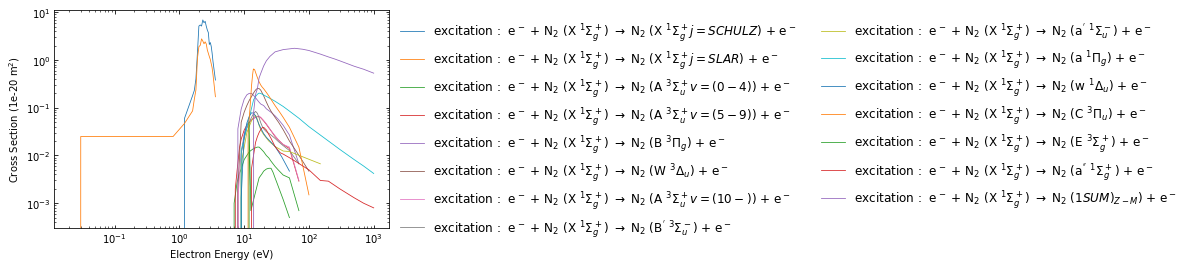

In [7]:
n_phelps.plot(units_sigma=1E-20, process='excitation',
              plot_param_dict = {'linewidth':.8}, 
              #xlim_param_dict = {'left': 0.01, 'right': 120.0}, 
              ylog=True, xlog=True, max_plots=40, width=8, height=4) 

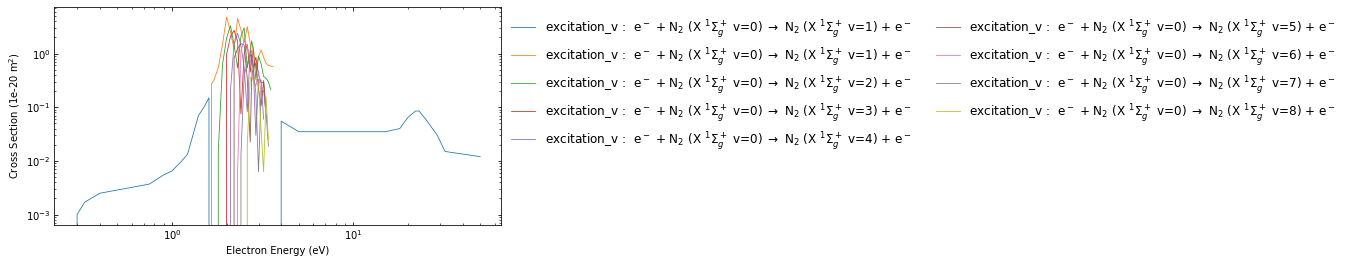

In [8]:
n_phelps.plot(units_sigma=1E-20, process='excitation_v',
              plot_param_dict = {'linewidth':.8}, 
              #xlim_param_dict = {'left': 0.01, 'right': 120.0}, 
              ylog=True, xlog=True, max_plots=40, width=8, height=4) 

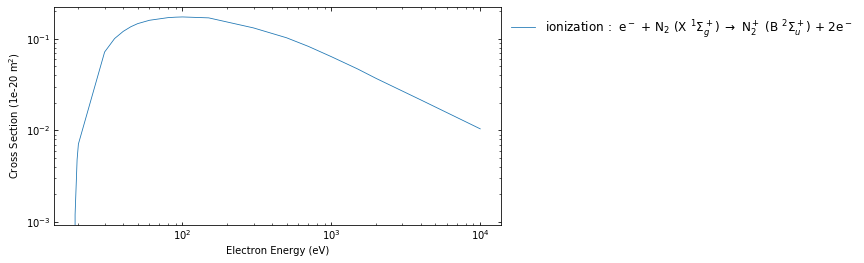

In [9]:
n_phelps.plot(units_sigma=1E-20, process='ionization',
              plot_param_dict = {'linewidth':.8}, 
              #xlim_param_dict = {'left': 0.01, 'right': 120.0}, 
              ylog=True, xlog=True, max_plots=40, width=8, height=4) 

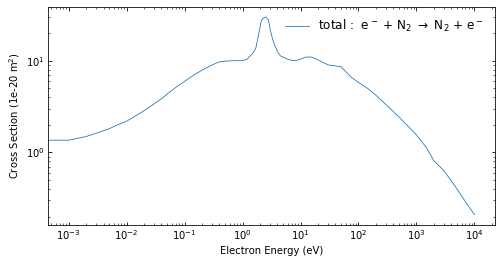

In [10]:
n_phelps.plot(units_sigma=1E-20, process='total',
              plot_param_dict = {'linewidth':.8}, 
              #xlim_param_dict = {'left': 0.01, 'right': 120.0}, 
              ylog=True, xlog=True, max_plots=40, width=8, height=4) 

# `phelps_min`

The `phelps_min` model consists of three cross section data sets.

1. The `total` cross section (labelled "effective" in LxCat parlance) from the complete `phelps` data set.

2. The `ionization_total` cross section from the complete `phelps` data set.

3. An `excitation_total` cross section determined by interpolating and summing the electronic, rotational, and vibtrational excitations from the complete `phelps` data set. See the `05_phelps_excitation_total` notebook in the `nepc_cs` project for details on how it is constructed.

In [11]:
n_phelps_min = nepc.Model(cursor, "phelps_min")

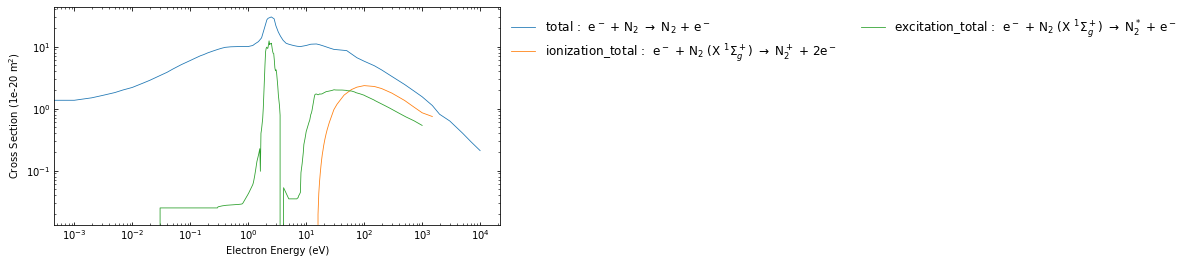

In [12]:
n_phelps_min.plot(units_sigma=1E-20,
              plot_param_dict = {'linewidth':.8}, 
              #xlim_param_dict = {'left': 0.01, 'right': 120.0}, 
              ylog=True, xlog=True, max_plots=40, width=8, height=4) 

In [13]:
cnx.close()